In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
dataset = pd.read_csv('Data.csv')
dataset

,Appliance,Rated Power (kWh),Duration (hours),LL,UL
0,Refrigerator,0.50,24,0,24
1,Television,0.50,6,17,23
2,Indoor Lighting,0.50,5,18,23
3,AC,1.50,3,12,15
4,Washing Machine,1.00,2,13,15
5,Dish Washer,0.75,2,20,22


In [ ]:
shiftable = [4, 5]
load = [0]*24
offpeak_start = 0 #am
offpeak_end = 5 #am

In [ ]:
for i in range(dataset.shape[0]):
  data = dataset.iloc[i, :]
  if i in shiftable:
    maxloads = [0]*(offpeak_end+1-data['Duration (hours)']-offpeak_start)
    for j in range(offpeak_start, offpeak_end+1-data['Duration (hours)']):
      maxloads[j] = max(load[j:(j+data['Duration (hours)']-1)])
    load[maxloads.index(min(maxloads)):(maxloads.index(min(maxloads))+data['Duration (hours)'])] += data['Rated Power (kWh)']
  else:
    load[data['LL']:(data['UL']-1)] += data['Rated Power (kWh)']

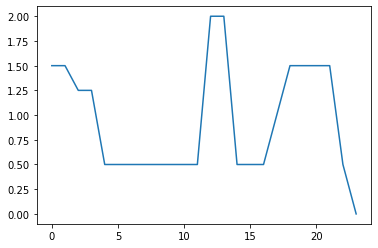

In [ ]:
plt.plot(load)
plt.show()